In [111]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [70]:
housing_df = pd.read_csv("datasets/housing.csv").dropna()

In [71]:
print(f' Dataframe shape is: {housing_df.shape}')
print(f'Splitting section is at {len(housing_df.index) * 0.8}')

 Dataframe shape is: (20433, 10)
Splitting section is at 16346.400000000001


In [96]:
housing_df = housing_df.sample(frac=1, random_state=2)
train_df = housing_df[:17000]
train_df = train_df.reset_index(drop=True)
test_df = housing_df[17000:]
test_df = test_df.reset_index(drop=True)

In [107]:
y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape

((17000,), (3433,))

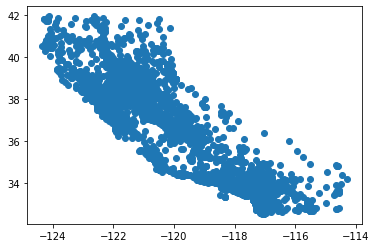

In [97]:
plt.scatter(train_df['longitude'], train_df['latitude'])

In [139]:
x_train_lat_long = train_df[['longitude', 'latitude']].to_numpy()
kmeans = KMeans(n_clusters=5).fit(x_train_lat_long)
kmeans.labels_

array([1, 1, 1, ..., 2, 1, 4], dtype=int32)

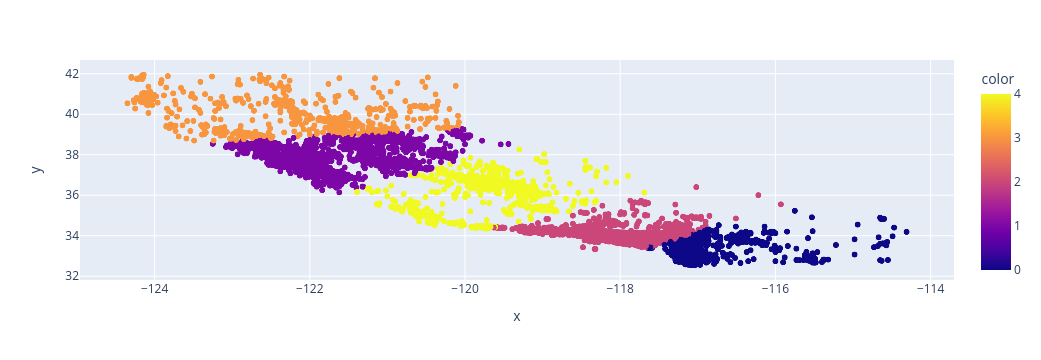

In [140]:
px.scatter(x = train_df['longitude'], y = train_df['latitude'], color = kmeans.labels_)

In [141]:
x_train_clustering = pd.get_dummies(pd.Series(kmeans.labels_)).to_numpy()
x_train_clustering

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [142]:
x_test_lat_long = test_df[['longitude', 'latitude']].to_numpy()
x_test_clustering = pd.get_dummies(pd.Series(kmeans.predict(x_test_lat_long))).to_numpy()
x_test_clustering.shape

(3433, 5)

In [144]:
# Model
clustering = LinearRegression().fit(x_train_clustering, y_train)
clustering_test_predictions = clustering.predict(x_test_clustering)
mean_absolute_error(clustering_test_predictions, y_test)

83699.32653655695